**Neural Networks**  
**EE 258 – Fall 2021**  
**Class Project**  
  

**Classification of flower images**

**In this part of the code we are computing four different models and their performance is plotted at the end together**

In [ ]:
# Install and gathering all libraries needed

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

sys.version
!pip install split-folders -q
import splitfolders
from urllib.request import urlopen
from zipfile import ZipFile
import shutil 

In [ ]:
input_folder="./dataset/originalDataset"
output_folder="./dataset/projectDataset"
base_path = "./dataset/originalDataset"

In [ ]:
# We are downloading the dataset from our github reop [https://github.com/chyavanphadke/Classification_of_flower_images]
# Firstly the github repo is downloaded as zip,
# Later the zip file is extracted in to project directory and only dataset folder is retained and rest is deleted
# if the dataset folder is already present then we are not downloading the dataset again.

if(os.path.exists("./dataset/projectDataset/train")):
    print("Dataset already Downloaded")
else:
    # Download the dataset zip file from github and extract into local repo
    zipurl = "https://codeload.github.com/chyavanphadke/Classification_of_flower_images/zip/refs/heads/main"
    zipresp = urlopen(zipurl)
    tempzip = open("./tempdatasetdownload.zip", "wb")
    tempzip.write(zipresp.read())
    tempzip.close()
    zf = ZipFile("./tempdatasetdownload.zip")
    zf.extractall(path = './dataset/')
    shutil.copytree("./dataset/Classification_of_flower_images-main/dataset/originalDataset", "./dataset/originalDataset");
    zf.close()
    splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(0.7,0.2,0.1),group_prefix=None);
    !rm -rf /content/tempdatasetdownload.zip
    !rm -rf /content/dataset/Classification_of_flower_images-main

Copying files: 4317 files [00:01, 4210.93 files/s]


In [ ]:
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
fnames = []
for category in categories:
    flower_folder = os.path.join(base_path, category)
    file_names = os.listdir(flower_folder)
    full_path = [os.path.join(flower_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

In [ ]:
print('length for each category:', [len(f) for f in fnames])

length for each category: [764, 1052, 784, 733, 984]


In [ ]:
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_category_images)

In [ ]:
print('number of images for each category:', [len(f) for f in images])

number of images for each category: [764, 1052, 784, 733, 984]


In [ ]:
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is the min shape for %s' % (np.min(widths), np.min(heights), categories[i]))

134,134 is the min shape for daisy
98,134 is the min shape for dandelion
80,150 is the min shape for rose
134,152 is the min shape for sunflower
134,134 is the min shape for tulip


In [ ]:
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

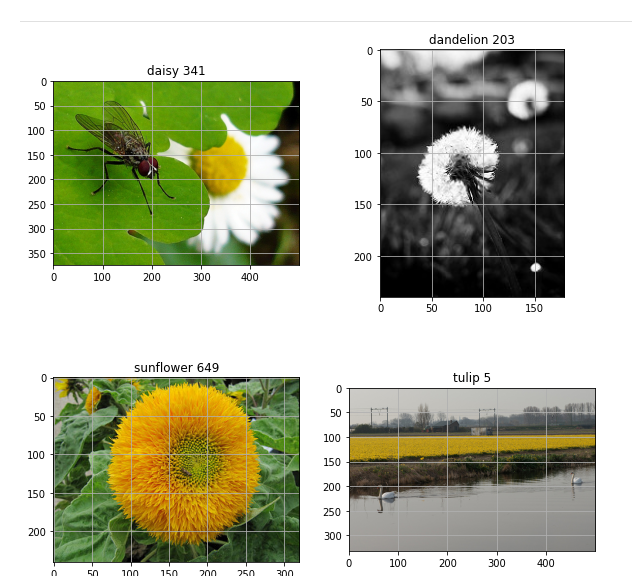

In [ ]:
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(2,3,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid('off')
    plt.title(categories[i]+' '+str(idx))
plt.show()

In [ ]:
img_width, img_height = 256, 256

img = images[3][659]
print(img.shape)
resized_img = resize(img, (img_width, img_height, 3))
resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)
print(resized_img.shape)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('original image (BGR-channel)')
plt.grid(False)
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('original image (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(img))
plt.subplot(2,2,3)
plt.title('resized by skimage (BGR-channel)')
plt.grid(False)
plt.imshow((resized_img))
plt.subplot(2,2,4)
plt.title('resized by opencv (RGB-channel)')
plt.grid(False)

In [ ]:
# Apply resize to all images
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [ ]:
# Append images
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

In [ ]:
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('sum of train images:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[611, 841, 627, 586, 787]
sum of train images: 3452
[153, 211, 157, 147, 197]
sum of val_images: 865


In [ ]:
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)

In [ ]:
# Dataset conversion
print('Before converting')
print('train data:', train_images.shape)
print('train labels:', train_categories.shape)

train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = np_utils.to_categorical(train_categories, len(categories))
val_labels = np_utils.to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)

Before converting
train data: (3452, 256, 256, 3)
train labels: (3452,)

After converting
train data: (3452, 256, 256, 3)
train labels: (3452, 5)


In [ ]:
seed = 100
np.random.seed(seed)
np.random.shuffle(train_data)
np.random.seed(seed)
np.random.shuffle(train_labels)
np.random.seed(seed)
np.random.shuffle(val_data)
np.random.seed(seed)
np.random.shuffle(val_labels)

In [ ]:
# Display the sahpe of dataset
train_data = train_data[:3400]
train_labels = train_labels[:3400]
val_data = val_data[:860]
val_labels = val_labels[:860]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

shape of train data: (3400, 256, 256, 3)
shape of train labels: (3400, 5)
shape of val data: (860, 256, 256, 3)
shape of val labels: (860, 5)


In [ ]:
# Model 1 defination
# I have defined Models as functions, and calling the function during displaying the description nad training.

def create_custom_model_1():

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=train_data.shape[1:], activation='relu', name='conv_1'))
    model.add(Conv2D(32, (3,3), activation='relu', name='conv_2'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3'))
    model.add(Conv2D(64, (3,3), activation='relu', name='conv_4'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', name='conv_5'))
    model.add(Conv2D(128, (3,3), activation='relu', name='conv_6'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', name='dense_1'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(Dense(len(categories), name='output'))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
    return model

In [ ]:
# Model 2 defination
# I have defined Models as functions, and calling the function during displaying the description nad training.

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *


def create_model_from_VGG19():
    model = VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

    for layer in model.layers[:1]:
      layer.trainable = False
      
    # Adding Layers  
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation="relu")(x)
    predictions = Dense(len(categories), activation="softmax")(x)
    
    # creating the final model 
    final_model = Model(inputs = model.input, outputs = predictions)
    
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return final_model

In [ ]:
# Model 3 defination
# I have defined Models as functions, and calling the function during displaying the description nad training.

def create_custom_model_2():

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=train_data.shape[1:], activation='relu', name='conv_1'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', name='dense_1'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(Dense(len(categories), name='output'))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [ ]:
# Model 4 defination
# I have defined Models as functions, and calling the function during displaying the description nad training.

def create_custom_model_3():

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=train_data.shape[1:], activation='relu', name='conv_1'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', name='conv_5'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', name='dense_1'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(Dense(len(categories), name='output'))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [ ]:
model_scratch_1 = create_custom_model_1()
model_scratch_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv_2 (Conv2D)             (None, 254, 254, 32)      9248      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 127, 127, 32)      0         
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv_3 (Conv2D)             (None, 127, 127, 64)      18496     
                                                                 
 conv_4 (Conv2D)             (None, 125, 125, 64)      36928     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 62, 62, 64)        0

In [ ]:
my_model_VGG19 = create_model_from_VGG19()
my_model_VGG19.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
model_scratch_2 = create_custom_model_2()
model_scratch_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 128, 128, 32)      0         
                                                                 
 conv_3 (Conv2D)             (None, 128, 128, 64)      18496     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 64, 64, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 262144)            0         
                                                                 
 dense_1 (Dense)             (None, 512)               134218240 
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [ ]:
model_scratch_3 = create_custom_model_3()
model_scratch_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 128, 128, 32)      0         
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv_3 (Conv2D)             (None, 128, 128, 64)      18496     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 64, 64, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv_5 (Conv2D)             (None, 64, 64, 128)      

## Prepare input data

In [ ]:
#Parameters
batch_size = 32
epochs1 = 50
epochs2 = 10
epochs3 = 75
epochs4 = 30

In [ ]:
# ImageDataGenerator is ued to augment the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255,)
train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size)

In [ ]:
# Training model 1
 
model_scratch_1_info = model_scratch_1.fit(
    train_generator, 
    steps_per_epoch=len(train_data)/batch_size,
    epochs=epochs1, 
    validation_steps=len(val_data)/batch_size,
    validation_data=val_generator, 
    verbose=2)

Epoch 1/50
106/106 - 58s - loss: 1.5856 - acc: 0.2403 - val_loss: 1.4334 - val_acc: 0.3221 - 58s/epoch - 549ms/step
Epoch 2/50
106/106 - 47s - loss: 1.5146 - acc: 0.2844 - val_loss: 1.4221 - val_acc: 0.3140 - 47s/epoch - 439ms/step
Epoch 3/50
106/106 - 47s - loss: 1.4473 - acc: 0.2985 - val_loss: 1.3482 - val_acc: 0.3721 - 47s/epoch - 438ms/step
Epoch 4/50
106/106 - 48s - loss: 1.3666 - acc: 0.4012 - val_loss: 1.1465 - val_acc: 0.5709 - 48s/epoch - 448ms/step
Epoch 5/50
106/106 - 48s - loss: 1.1534 - acc: 0.5294 - val_loss: 1.0702 - val_acc: 0.5593 - 48s/epoch - 448ms/step
Epoch 6/50
106/106 - 47s - loss: 1.1099 - acc: 0.5456 - val_loss: 1.0598 - val_acc: 0.5686 - 47s/epoch - 446ms/step
Epoch 7/50
106/106 - 48s - loss: 1.0918 - acc: 0.5512 - val_loss: 1.0394 - val_acc: 0.5640 - 48s/epoch - 449ms/step
Epoch 8/50
106/106 - 47s - loss: 1.0850 - acc: 0.5629 - val_loss: 0.9898 - val_acc: 0.6023 - 47s/epoch - 445ms/step
Epoch 9/50
106/106 - 47s - loss: 1.0485 - acc: 0.5724 - val_loss: 1.0651

In [ ]:
# Training model 2

my_model_VGG19_info = my_model_VGG19.fit(
    train_generator, 
    steps_per_epoch=len(train_data)/batch_size,
    epochs=epochs2, 
    validation_steps=len(val_data)/batch_size,
    validation_data=val_generator,
    verbose=2)

Epoch 1/10
106/106 - 68s - loss: 3.3561 - acc: 0.2388 - val_loss: 1.5988 - val_acc: 0.2453 - 68s/epoch - 636ms/step
Epoch 2/10
106/106 - 58s - loss: 1.6001 - acc: 0.2447 - val_loss: 1.5990 - val_acc: 0.2453 - 58s/epoch - 545ms/step
Epoch 3/10
106/106 - 58s - loss: 1.5997 - acc: 0.2438 - val_loss: 1.5990 - val_acc: 0.2453 - 58s/epoch - 541ms/step
Epoch 4/10
106/106 - 58s - loss: 1.5996 - acc: 0.2365 - val_loss: 1.5991 - val_acc: 0.2453 - 58s/epoch - 542ms/step
Epoch 5/10
106/106 - 58s - loss: 1.5995 - acc: 0.2400 - val_loss: 1.5986 - val_acc: 0.2453 - 58s/epoch - 550ms/step
Epoch 6/10
106/106 - 58s - loss: 1.5993 - acc: 0.2441 - val_loss: 1.5989 - val_acc: 0.2453 - 58s/epoch - 548ms/step
Epoch 7/10
106/106 - 58s - loss: 1.5997 - acc: 0.2441 - val_loss: 1.5986 - val_acc: 0.2453 - 58s/epoch - 542ms/step
Epoch 8/10
106/106 - 57s - loss: 1.5996 - acc: 0.2359 - val_loss: 1.5986 - val_acc: 0.2453 - 57s/epoch - 541ms/step
Epoch 9/10
106/106 - 58s - loss: 1.5992 - acc: 0.2441 - val_loss: 1.5988

In [ ]:
# Training model 3

model_scratch_2_info = model_scratch_2.fit(
    train_generator, 
    steps_per_epoch=len(train_data)/batch_size,
    epochs=epochs3, 
    validation_steps=len(val_data)/batch_size,
    validation_data=val_generator, 
    verbose=2)

Epoch 1/75
106/106 - 45s - loss: 1.7449 - acc: 0.3868 - val_loss: 1.2082 - val_acc: 0.4977 - 45s/epoch - 422ms/step
Epoch 2/75
106/106 - 45s - loss: 1.1925 - acc: 0.5000 - val_loss: 1.1868 - val_acc: 0.5477 - 45s/epoch - 420ms/step
Epoch 3/75
106/106 - 44s - loss: 1.1577 - acc: 0.5185 - val_loss: 1.1622 - val_acc: 0.5151 - 44s/epoch - 416ms/step
Epoch 4/75
106/106 - 45s - loss: 1.0890 - acc: 0.5653 - val_loss: 1.0063 - val_acc: 0.5988 - 45s/epoch - 424ms/step
Epoch 5/75
106/106 - 45s - loss: 1.0392 - acc: 0.5876 - val_loss: 0.9373 - val_acc: 0.6395 - 45s/epoch - 420ms/step
Epoch 6/75
106/106 - 44s - loss: 1.0305 - acc: 0.5812 - val_loss: 0.9053 - val_acc: 0.6442 - 44s/epoch - 412ms/step
Epoch 7/75
106/106 - 44s - loss: 1.0038 - acc: 0.5988 - val_loss: 0.9376 - val_acc: 0.6326 - 44s/epoch - 416ms/step
Epoch 8/75
106/106 - 44s - loss: 0.9697 - acc: 0.6221 - val_loss: 0.9054 - val_acc: 0.6756 - 44s/epoch - 412ms/step
Epoch 9/75
106/106 - 44s - loss: 0.9709 - acc: 0.6265 - val_loss: 0.8378

In [ ]:
# Training model 4

model_scratch_3_info = model_scratch_3.fit(
    train_generator, 
    steps_per_epoch=len(train_data)/batch_size,
    epochs=epochs4, 
    validation_steps=len(val_data)/batch_size,
    validation_data=val_generator, 
    verbose=2)

Epoch 1/30
106/106 - 46s - loss: 1.6199 - acc: 0.3453 - val_loss: 1.2839 - val_acc: 0.4547 - 46s/epoch - 437ms/step
Epoch 2/30
106/106 - 46s - loss: 1.3111 - acc: 0.4382 - val_loss: 1.2166 - val_acc: 0.4558 - 46s/epoch - 433ms/step
Epoch 3/30
106/106 - 46s - loss: 1.2015 - acc: 0.4774 - val_loss: 1.1239 - val_acc: 0.4965 - 46s/epoch - 430ms/step
Epoch 4/30
106/106 - 45s - loss: 1.1747 - acc: 0.4803 - val_loss: 1.0959 - val_acc: 0.5314 - 45s/epoch - 426ms/step
Epoch 5/30
106/106 - 45s - loss: 1.1202 - acc: 0.5221 - val_loss: 1.0683 - val_acc: 0.5826 - 45s/epoch - 420ms/step
Epoch 6/30
106/106 - 45s - loss: 1.1037 - acc: 0.5418 - val_loss: 1.0020 - val_acc: 0.5779 - 45s/epoch - 422ms/step
Epoch 7/30
106/106 - 46s - loss: 1.0475 - acc: 0.5700 - val_loss: 0.9487 - val_acc: 0.6233 - 46s/epoch - 429ms/step
Epoch 8/30
106/106 - 46s - loss: 1.0136 - acc: 0.6018 - val_loss: 0.8451 - val_acc: 0.6733 - 46s/epoch - 430ms/step
Epoch 9/30
106/106 - 46s - loss: 0.9838 - acc: 0.6138 - val_loss: 0.8697

In [ ]:
def return_name(label_arr):
  idx = np.where(label_arr == 1)
  return idx[0][0]

In [ ]:
# This is a standard function called to plot all the four models

def plot_model_history(model_name, history, epochs):
  
  print(model_name)
  plt.figure(figsize=(15, 5))
  
  plt.subplot(1, 2 ,1)
  plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
  plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Accuracy vs. Validation Accuracy')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'validation'], loc='best')
  
  plt.subplot(1, 2, 2)
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Loss vs. Validation Loss')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'validation'], loc='best')
  
  
  plt.show()

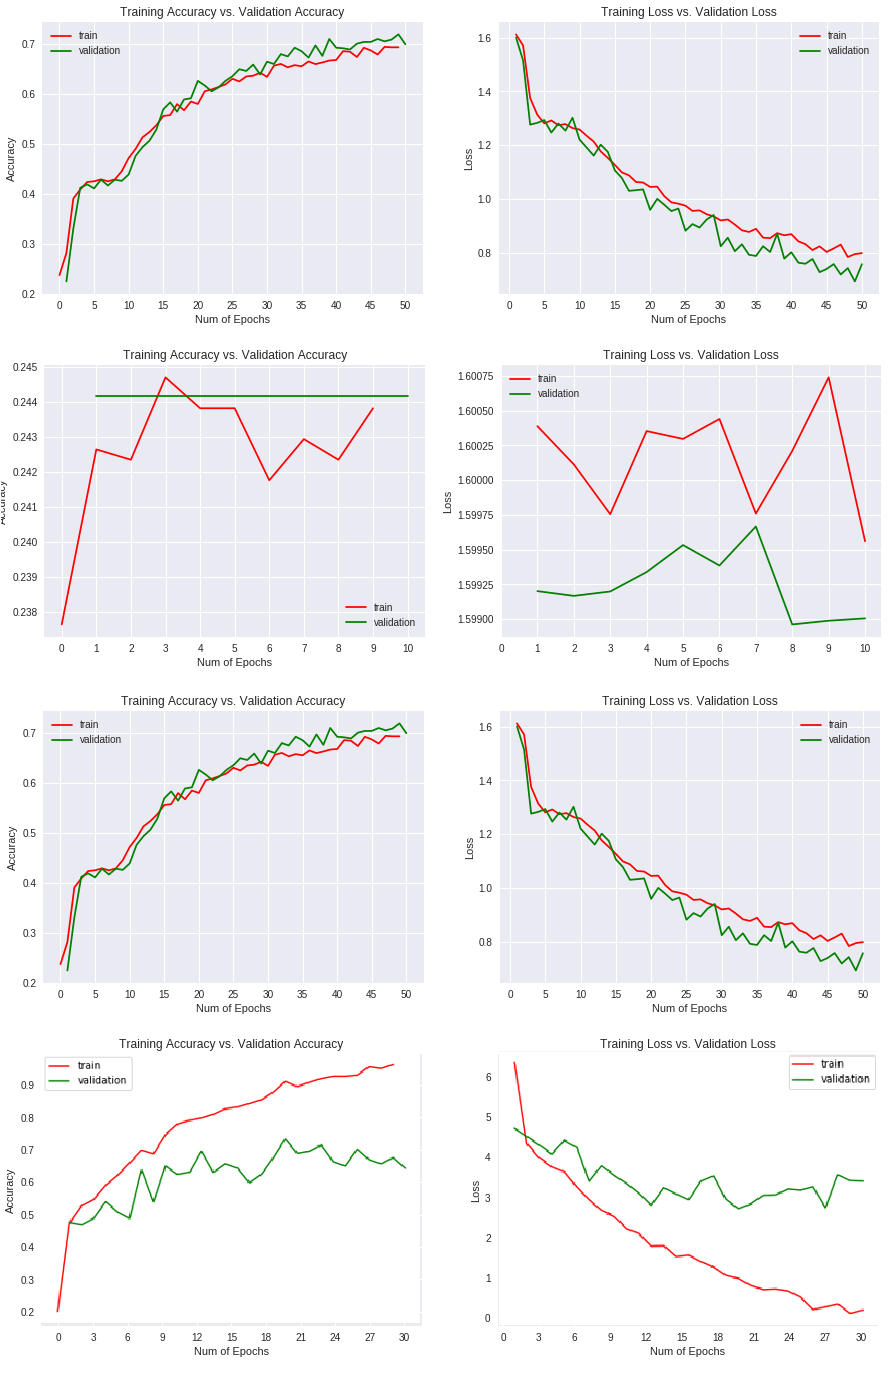

In [ ]:
plot_model_history('model_scratch_1', model_scratch_1_info.history, epochs1)
plot_model_history('my_model_VGG19', my_model_VGG19_info.history, epochs2)
plot_model_history('model_scratch_2', model_scratch_2_info.history, epochs3)
plot_model_history('model_scratch_3', model_scratch_3_info.history, epochs4)